In [1]:
import pandas as pd

In [2]:
regression_df = pd.read_csv("clean_data/ELA and Math clean.csv")
regression_df

,RCDTS,County,Dist #,District Name/ School Name,City,ELA,Math
0,010010010260000,Adams,10,Payson CUSD 1,Payson,524.3,489.1
1,010010010260001,Adams,10,Seymour High School,Payson,524.3,489.1
2,010010020260000,Adams,20,Liberty CUSD 2,Liberty,500.9,485.4
3,010010020260001,Adams,20,Liberty High School,Liberty,500.9,485.4
4,010010030260000,Adams,30,Central CUSD 3,Camp Point,490.6,488.3
...,...,...,...,...,...,...,...
1192,56099255U260000,Will,255U,Reed Custer CUSD 255U,Braidwood,479.1,483.8
1193,56099255U260001,Will,255U,Reed-Custer High School,Braidwood,480.3,484.9
1194,56099365U260000,Will,365U,Valley View CUSD 365U,Romeoville,490.3,489.1
1195,56099365U260007,Will,365U,Bolingbrook High School,Bolingbrook,490.0,490.8


In [3]:
general_df = pd.read_csv("clean_data/high_school_filtered.csv")
general_df

,RCDTS,Type,District,School Type,City,County,District Type,District Size,Student Enrollment - Total,Student Enrollment - Low Income %,...,Teacher Retention Rate,# of 12 graders who took advanced Courses,Avg Number of days of Physical Education Per Week Per Student,Community College Remediation %,Avg Class Size - High School,Chronic Absenteeism,Number of students who took AP Exams Grade 10,Number of students who passed AP Exams Grade 12,Chronic Absenteeism - Low Income,Low Income Count
0,010011720220003,School,Quincy SD 172,HIGH SCHOOL,Quincy,Adams,UNIT,LARGE,1753.0,50.3,...,81.9,151.0,5.0,29.2,20.0,31.3,35.0,120.0,47.5,881.759
1,010691170220014,School,Jacksonville SD 117,HIGH SCHOOL,Jacksonville,Morgan,UNIT,LARGE,986.0,47.4,...,85.9,41.0,4.0,69.0,17.0,26.1,11.0,49.0,37.4,467.364
2,040041000260002,School,Belvidere CUSD 100,HIGH SCHOOL,Belvidere,Boone,UNIT,LARGE,1515.0,32.7,...,91.9,136.0,5.0,40.5,22.0,18.7,16.0,25.0,30.1,495.405
3,040042000260003,School,North Boone CUSD 200,HIGH SCHOOL,Poplar Grove,Boone,UNIT,MEDIUM,503.0,45.3,...,80.5,30.0,5.0,33.3,18.0,3.4,44.0,33.0,6.2,227.859
4,041011220220002,School,Harlem UD 122,HIGH SCHOOL,Machesney Park,Winnebago,UNIT,LARGE,1529.0,49.2,...,84.3,132.0,5.0,38.3,21.0,43.2,35.0,271.0,55.1,752.268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0560992100160004,School,Lincoln Way CHSD 210,HIGH SCHOOL,New Lenox,Will,HIGH SCHOOL,LARGE,1905.0,8.5,...,90.0,290.0,5.0,37.2,20.0,19.3,138.0,500.0,0.0,161.925
201,056099200U260001,School,Beecher CUSD 200U,HIGH SCHOOL,Beecher,Will,UNIT,MEDIUM,323.0,24.5,...,80.3,37.0,4.0,45.5,14.0,14.6,13.0,31.0,18.6,79.135
202,056099201U260001,School,Crete Monee CUSD 201U,HIGH SCHOOL,Crete,Will,UNIT,LARGE,1638.0,67.4,...,72.9,253.0,5.0,47.0,23.0,30.4,35.0,51.0,35.5,1104.012
203,056099365U260007,School,Valley View CUSD 365U,HIGH SCHOOL,Bolingbrook,Will,UNIT,LARGE,3550.0,59.4,...,90.0,410.0,5.0,45.1,19.0,32.5,261.0,511.0,39.5,2108.700


In [4]:
gen_df = general_df.filter(['RCDTS', 'Student Enrollment - Low Income %', 'Avg Class Size – All Grades', 'Avg Teaching Exp',
                           'Bachelor Degree', 'Masters Degree', 'Teacher Retention Rate', 'Admin Avg Salary'], axis = 1)
gen_df = gen_df.dropna()
gen_df.rename(columns = {'Avg Class Size – All Grades':'ClassSize'}, inplace = True)
gen_df.rename(columns = {'Student Enrollment - Low Income %':'LowIncome'}, inplace = True)
gen_df

,RCDTS,LowIncome,ClassSize,Teacher Retention Rate
0,010011720220003,50.3,20.0,81.9
1,010691170220014,47.4,17.0,85.9
2,040041000260002,32.7,22.0,91.9
3,040042000260003,45.3,18.0,80.5
4,041011220220002,49.2,21.0,84.3
...,...,...,...,...
200,0560992100160004,8.5,20.0,90.0
201,056099200U260001,24.5,14.0,80.3
202,056099201U260001,67.4,23.0,72.9
203,056099365U260007,59.4,19.0,90.0


In [98]:
df = pd.merge(regression_df, gen_df, on = "RCDTS", how = "left")
df = df.dropna()
df

,RCDTS,County,Dist #,District Name/ School Name,City,ELA,Math,LowIncome,ClassSize,Avg Teaching Exp,Bachelor Degree,Masters Degree,Teacher Retention Rate,Admin Avg Salary
989,500821870260000,Saint Clair,1870,Cahokia CUSD 187,Cahokia,418.4,391.8,88.5,23.0,15.1,52.7,46.0,80.6,99262.57
991,500821880220000,Saint Clair,1880,Brooklyn UD 188,Lovejoy,382.5,362.5,99.2,2.0,13.6,70.0,30.0,83.3,113291.51
993,500821890220000,Saint Clair,1890,East St Louis SD 189,East Saint Louis,408.5,386.0,82.5,17.0,10.8,43.2,56.1,75.8,97685.79
995,500821960260000,Saint Clair,1960,Dupo CUSD 196,Dupo,476.6,464.5,58.3,17.0,11.7,57.1,42.9,91.3,96239.27
997,500822010170000,Saint Clair,2010,Belleville Twp HSD 201,Belleville,491.7,479.7,45.1,19.0,15.9,33.1,66.1,92.8,108767.39
1000,500822030170000,Saint Clair,2030,O Fallon Twp HSD 203,O Fallon,540.7,538.4,21.5,20.0,14.7,23.9,73.9,94.7,111454.35
1002,510652000260000,Menard,2000,Greenview CUSD 200,Greenview,450.7,422.9,43.1,14.0,10.4,56.0,44.0,83.3,86215.77
1004,510652020260000,Menard,2020,Porta CUSD 202,Petersburg,493.4,461.2,40.2,18.0,15.0,49.4,49.4,90.1,98200.41
1006,510652130260000,Menard,2130,Athens CUSD 213,Athens,522.3,509.1,32.2,20.0,14.6,63.8,36.2,89.2,100527.02
1008,510840010260000,Sangamon,10,Tri City CUSD 1,Buffalo,487.1,490.0,37.6,16.0,12.1,84.4,15.6,71.7,93040.58


In [76]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

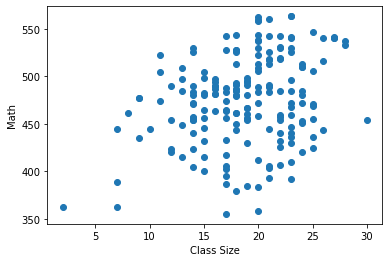

(183,)


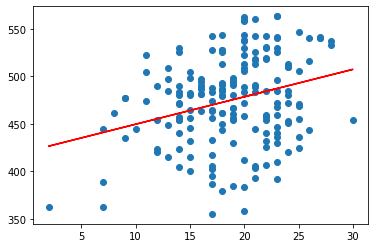

Coefficient  [2.88916252]
Intercept  420.50708577670474


In [89]:
plt.scatter(df.ClassSize, df.Math)
plt.xlabel('Class Size')
plt.ylabel('Math')
plt.show()

X = df.ClassSize.values.reshape(-1, 1)
y = df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

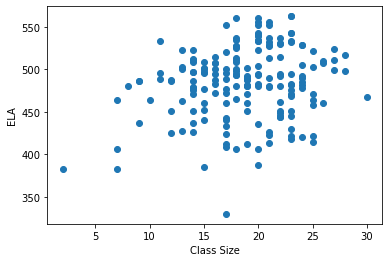

(183,)


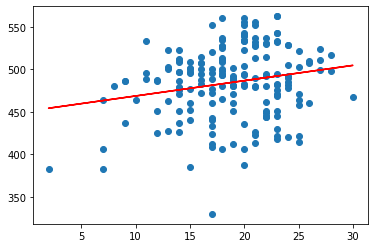

Coefficient  [1.80075683]
Intercept  450.70660860066687


In [86]:
plt.scatter(df.ClassSize, df.ELA)
plt.xlabel('Class Size')
plt.ylabel('ELA')
plt.show()

X = df.ClassSize.values.reshape(-1, 1)
y = df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

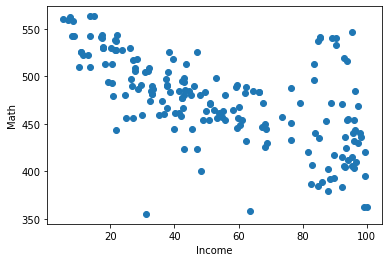

None
(183,)


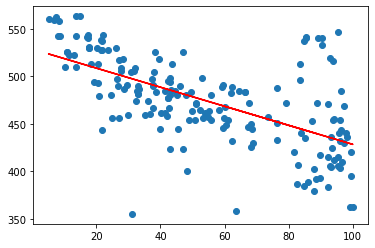

None
Coefficient  [-1.00381578]
Intercept  528.5539231002647


In [87]:
plt.scatter(df.LowIncome, df.Math)
plt.xlabel('Income')
plt.ylabel('Math')
print(plt.show())

X = df.LowIncome.values.reshape(-1, 1)
y = df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
print(plt.show())

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

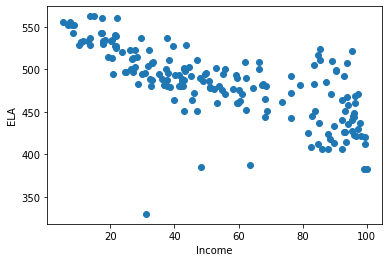

None
(183,)


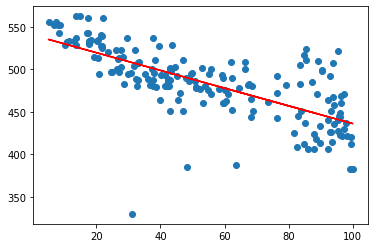

None
Coefficient  [-1.04332688]
Intercept  540.5206038661339


In [88]:
plt.scatter(df.LowIncome, df.ELA)
plt.xlabel('Income')
plt.ylabel('ELA')
print(plt.show())

X = df.LowIncome.values.reshape(-1, 1)
y = df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
print(plt.show())

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)